In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [95]:
df=pd.read_csv("C:/Users/Kiran/OneDrive/Desktop/train.csv")
test=pd.read_csv("C:/Users/Kiran/OneDrive/Desktop/test.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [96]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [97]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [98]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [99]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [101]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [102]:
#to check for missing values in the data
total=df.isnull().sum().sort_values(ascending=False)
percent_1=df.isnull().sum()/df.isnull().count()*100
percent_2=(round(percent_1,1)).sort_values(ascending=False)
missing_data=pd.concat([total,percent_2],axis=1,keys=['Total','%'])
print(missing_data)

             Total     %
Cabin          687  77.1
Age            177  19.9
Embarked         2   0.2
PassengerId      0   0.0
Survived         0   0.0
Pclass           0   0.0
Name             0   0.0
Sex              0   0.0
SibSp            0   0.0
Parch            0   0.0
Ticket           0   0.0
Fare             0   0.0


In [103]:
df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [104]:
df['Embarked']=df['Embarked'].fillna('S')

In [105]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [106]:
test.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [107]:
l=list(test.Fare.describe())

In [108]:
l[1]

35.627188489208635

In [109]:
test['Fare']=test['Fare'].fillna(l[1])

In [110]:
test.Fare.describe()

count    418.000000
mean      35.627188
std       55.840500
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [111]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [112]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


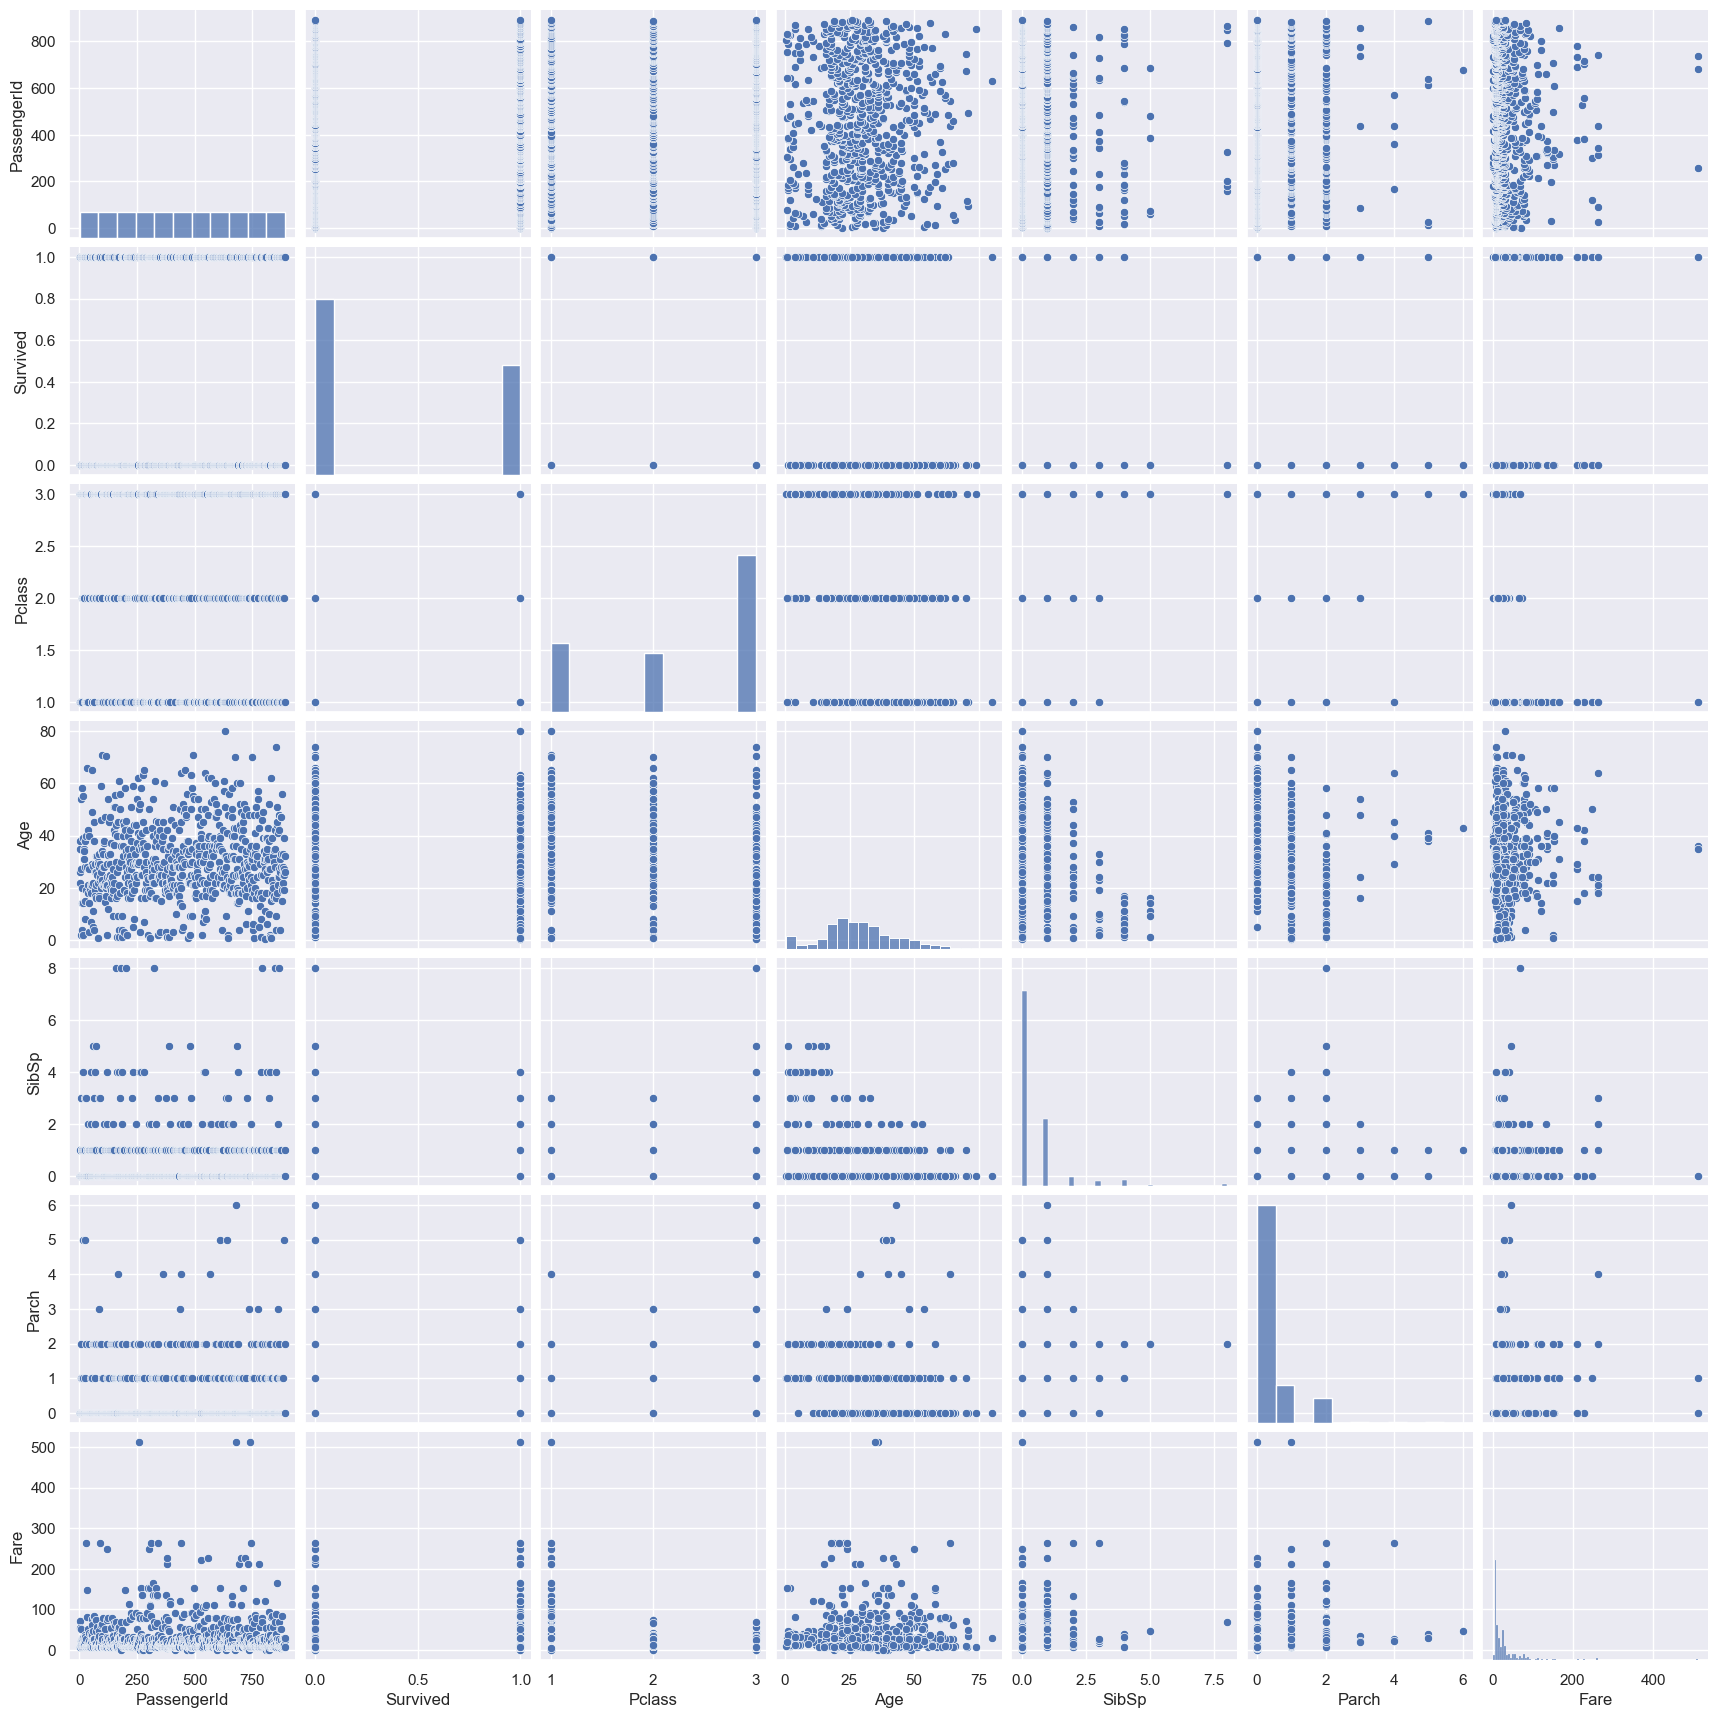

In [113]:
sns.pairplot(data=df)

Text(0.5, 1.0, 'Female')

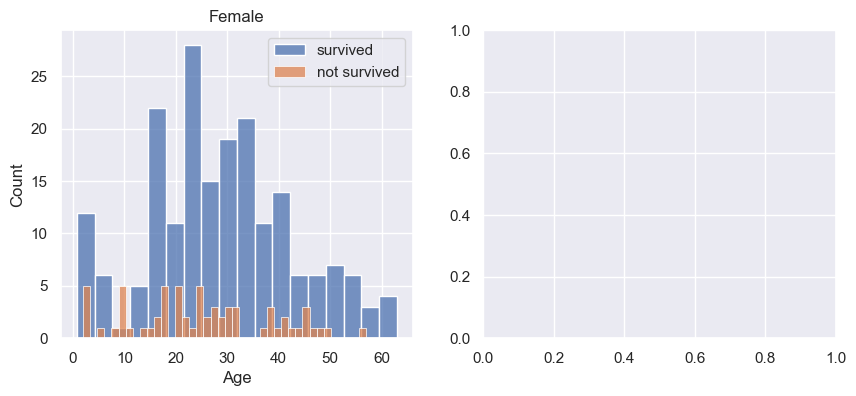

In [114]:
#DROPPING/REPLACING THE UNNECESSARY COLUMNS
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
women=df[df['Sex']=='female']
men=df[df['Sex']=='male']
ax=sns.histplot(women[women['Survived']==1].Age.dropna(), bins=18, label=survived, ax=axes[0], kde=False)
ax=sns.histplot(women[women['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')

In [115]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Text(0.5, 1.0, 'Male')

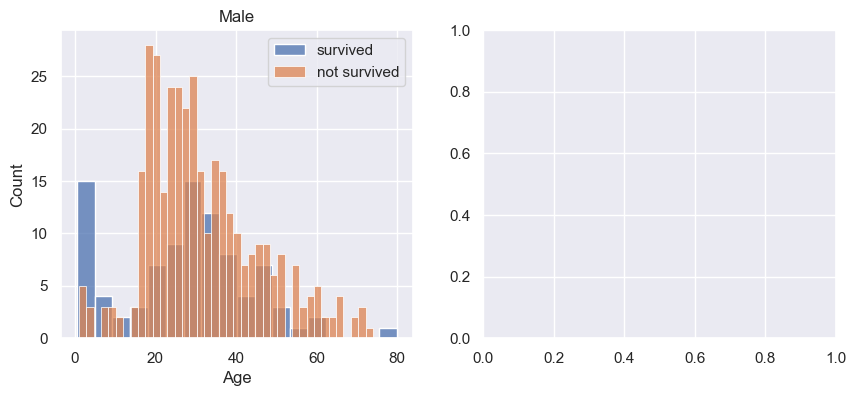

In [116]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax=sns.histplot(men[men['Survived']==1].Age.dropna(), bins=18, label=survived, ax=axes[0], kde=False)
ax=sns.histplot(men[men['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Male')

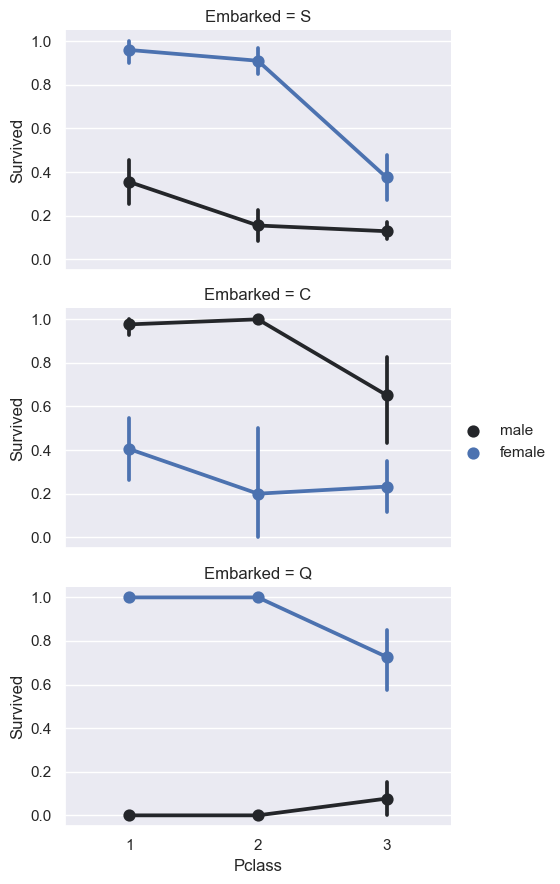

In [117]:
FacetGrid=sns.FacetGrid(df,row='Embarked',aspect=1.6)
FacetGrid.map(sns.pointplot,'Pclass','Survived','Sex',palette=None,order=None,hue_order=None)
FacetGrid.add_legend()

1    537
0    354
Name: not_alone, dtype: int64

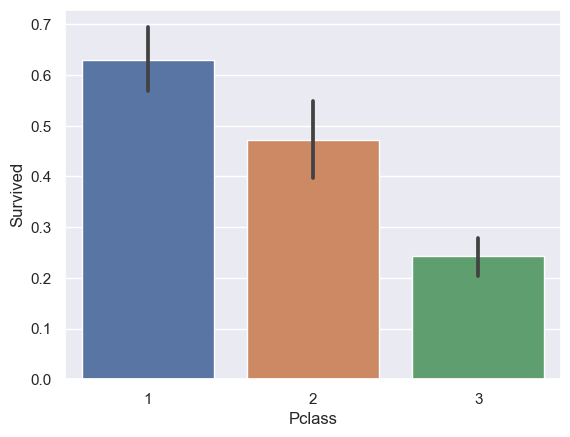

In [118]:
sns.barplot(x='Pclass',y='Survived',data=df)
df['relatives']=df['SibSp']+df['Parch']
df.loc[df['relatives']>0,'not_alone']=0
df.loc[df['relatives']==0,'not_alone']=1
df['not_alone']=df['not_alone'].astype(int)
df['not_alone'].value_counts()

In [119]:
df=df.drop(['PassengerId'],axis=1)
test=test.drop(['PassengerId'],axis=1)

In [120]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [121]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1


In [122]:
test['relatives']=test['SibSp']+test['Parch']
test.loc[test['relatives']>0,'not_alone']=0
test.loc[test['relatives']==0,'not_alone']=1
test['not_alone']=test['not_alone'].astype(int)

In [123]:
#REPLACEMENT OF MISSING VALUES IN 'CABIN' COLUMN
import re
Deck={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'U':8}
df['Cabin']=df['Cabin'].fillna("U0")
df['Deck']=df['Cabin'].map(lambda x:re.compile("([a-zA-Z]+)").search(x).group())
df['Deck']=df['Deck'].map(Deck)
df['Deck']=df['Deck'].fillna(0)
df['Deck']=df['Deck'].astype(int)
df=df.drop(['Cabin'],axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,8


In [124]:
Deck={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'U':8}
test['Cabin']=test['Cabin'].fillna("U0")
test['Deck']=test['Cabin'].map(lambda x:re.compile("([a-zA-Z]+)").search(x).group())
test['Deck']=test['Deck'].map(Deck)
test['Deck']=test['Deck'].fillna(0)
test['Deck']=test['Deck'].astype(int)
test=test.drop(['Cabin'],axis=1)
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,1,8
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,0,8
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,1,8
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1,8
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,2,0,8


In [125]:
#REPLACEMENT OF MISSING VALUES IN 'AGE' COLUMN
mean=df['Age'].mean()
std=df["Age"].std()
is_null=df["Age"].isnull().sum()
rand_age=np.random.randint(mean-std,mean+std,size=is_null)
age_slice=df['Age'].copy()
age_slice[np.isnan(age_slice)]=rand_age
df['Age']=age_slice
df['Age']=df['Age'].astype(int)
df["Age"].isnull().sum()
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0,1,8


In [126]:
df.isnull().sum()

Survived     0
Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Ticket       0
Fare         0
Embarked     0
relatives    0
not_alone    0
Deck         0
dtype: int64

In [127]:
#REPLACEMENT OF MISSING VALUES IN 'AGE' COLUMN
mean=test['Age'].mean()
std=test["Age"].std()
is_null=test["Age"].isnull().sum()
rand_age=np.random.randint(mean-std,mean+std,size=is_null)
age_slice=test['Age'].copy()
age_slice[np.isnan(age_slice)]=rand_age
test['Age']=age_slice
test['Age']=test['Age'].astype(int)
test["Age"].isnull().sum()
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q,0,1,8
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S,1,0,8
2,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q,0,1,8
3,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S,0,1,8
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S,2,0,8


In [128]:
test.isnull().sum()

Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Ticket       0
Fare         0
Embarked     0
relatives    0
not_alone    0
Deck         0
dtype: int64

In [129]:
#REPLACEMENT OF MISSING VALUES IN 'FARE' COLUMN
mean=df['Fare'].mean()
std=df["Fare"].std()
is_null=df["Fare"].isnull().sum()
rand_age=np.random.randint(mean-std,mean+std,size=is_null)
age_slice=df['Fare'].copy()
age_slice[np.isnan(age_slice)]=rand_age
df['Fare']=age_slice
df['Fare']=df['Fare'].astype(int)
df["Fare"].isnull().sum()

0

In [130]:
#to check if there are no missing values
df.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Survived   891 non-null    int64 
 1   Pclass     891 non-null    int64 
 2   Name       891 non-null    object
 3   Sex        891 non-null    object
 4   Age        891 non-null    int32 
 5   SibSp      891 non-null    int64 
 6   Parch      891 non-null    int64 
 7   Ticket     891 non-null    object
 8   Fare       891 non-null    int32 
 9   Embarked   891 non-null    object
 10  relatives  891 non-null    int64 
 11  not_alone  891 non-null    int32 
 12  Deck       891 non-null    int32 
dtypes: int32(4), int64(5), object(4)
memory usage: 76.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Name       418 non-

In [131]:
#DROPPING/REPLACING THE UNNECESSARY COLUMNS
titles={"Mr":1,'Miss':2,"Mrs":3,"Master":4,"Rare":5}
df['Title']=df.Name.str.extract('([A-Za-z]+)\.',expand=False)
df['Title']=df['Title'].replace(['Lady','Countess','Capt','Sir','Don','Col','Dr','Major','Rev','Dona'],'Rare')
df['Title']=df['Title'].replace("Mlle",'Miss')
df['Title']=df['Title'].replace('Ms','Miss')
df['Title']=df['Title'].replace('Mme','Mrs')
df['Title']=df['Title'].map(titles)
df['Title']=df['Title'].fillna(0)
df=df.drop(['Name'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,male,22,1,0,A/5 21171,7,S,1,0,8,1.0
1,1,1,female,38,1,0,PC 17599,71,C,1,0,3,3.0
2,1,3,female,26,0,0,STON/O2. 3101282,7,S,0,1,8,2.0
3,1,1,female,35,1,0,113803,53,S,1,0,3,3.0
4,0,3,male,35,0,0,373450,8,S,0,1,8,1.0


In [132]:
test['Fare']=test['Fare'].astype(int)
df['Title']=df['Title'].astype(int)

In [133]:
#DROPPING/REPLACING THE UNNECESSARY COLUMNS
titles={"Mr":1,'Miss':2,"Mrs":3,"Master":4,"Rare":5}
test['Title']=test.Name.str.extract('([A-Za-z]+)\.',expand=False)
test['Title']=test['Title'].replace(['Lady','Countess','Capt','Sir','Don','Col','Dr','Major','Rev','Dona'],'Rare')
test['Title']=test['Title'].replace("Mlle",'Miss')
test['Title']=test['Title'].replace('Ms','Miss')
test['Title']=test['Title'].replace('Mme','Mrs')
test['Title']=test['Title'].map(titles)
test['Title']=test['Title'].fillna(0)
test=test.drop(['Name'],axis=1)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,3,male,34,0,0,330911,7,Q,0,1,8,1
1,3,female,47,1,0,363272,7,S,1,0,8,3
2,2,male,62,0,0,240276,9,Q,0,1,8,1
3,3,male,27,0,0,315154,8,S,0,1,8,1
4,3,female,22,1,1,3101298,12,S,2,0,8,3


In [134]:
test.Title.describe()

count    418.000000
mean       1.741627
std        1.006091
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: Title, dtype: float64

In [135]:
#DROPPING/REPLACING THE UNNECESSARY COLUMNS
genders={'male':0,'female':1}
df['Sex']=df['Sex'].map(genders)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,A/5 21171,7,S,1,0,8,1
1,1,1,1,38,1,0,PC 17599,71,C,1,0,3,3
2,1,3,1,26,0,0,STON/O2. 3101282,7,S,0,1,8,2
3,1,1,1,35,1,0,113803,53,S,1,0,3,3
4,0,3,0,35,0,0,373450,8,S,0,1,8,1


In [136]:
#DROPPING/REPLACING THE UNNECESSARY COLUMNS
genders={'male':0,'female':1}
test['Sex']=test['Sex'].map(genders)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,3,0,34,0,0,330911,7,Q,0,1,8,1
1,3,1,47,1,0,363272,7,S,1,0,8,3
2,2,0,62,0,0,240276,9,Q,0,1,8,1
3,3,0,27,0,0,315154,8,S,0,1,8,1
4,3,1,22,1,1,3101298,12,S,2,0,8,3


In [137]:
test=test.drop(['Ticket'],axis=1)

In [138]:
df=df.drop(['Ticket'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Survived   891 non-null    int64 
 1   Pclass     891 non-null    int64 
 2   Sex        891 non-null    int64 
 3   Age        891 non-null    int32 
 4   SibSp      891 non-null    int64 
 5   Parch      891 non-null    int64 
 6   Fare       891 non-null    int32 
 7   Embarked   891 non-null    object
 8   relatives  891 non-null    int64 
 9   not_alone  891 non-null    int32 
 10  Deck       891 non-null    int32 
 11  Title      891 non-null    int32 
dtypes: int32(5), int64(6), object(1)
memory usage: 66.3+ KB


In [139]:
ports={'S':0,'C':1,'Q':2}
df['Embarked']=df['Embarked'].map(ports)
test['Embarked']=test['Embarked'].map(ports)

In [140]:
test.Embarked.unique()

array([2, 0, 1], dtype=int64)

In [141]:
df.loc[df['Age']<=11,'Age']=0
df.loc[(df['Age']>11)&(df['Age']<=18),'Age']=1
df.loc[(df['Age']>18)&(df['Age']<=22),'Age']=2
df.loc[(df['Age']>22)&(df['Age']<=27),'Age']=3
df.loc[(df['Age']>27)&(df['Age']<=33),'Age']=4
df.loc[(df['Age']>33)&(df['Age']<=40),'Age']=5
df.loc[(df['Age']>40)&(df['Age']<=66),'Age']=6
df.loc[df['Age']>66,'Age']=6
df['Age'].value_counts()

6    172
5    156
4    154
3    135
2    113
1     93
0     68
Name: Age, dtype: int64

In [142]:
test.loc[test['Age']<=11,'Age']=0
test.loc[(test['Age']>11)&(test['Age']<=18),'Age']=1
test.loc[(test['Age']>18)&(test['Age']<=22),'Age']=2
test.loc[(test['Age']>22)&(test['Age']<=27),'Age']=3
test.loc[(test['Age']>27)&(test['Age']<=33),'Age']=4
test.loc[(test['Age']>33)&(test['Age']<=40),'Age']=5
test.loc[(test['Age']>40)&(test['Age']<=66),'Age']=6
test.loc[test['Age']>66,'Age']=6
test['Age'].value_counts()

6    87
3    78
4    68
5    60
2    57
1    45
0    23
Name: Age, dtype: int64

In [143]:
test.loc[test['Fare']<=7.91,'Fare']=0
test.loc[(test['Fare']>7.91)&(test['Fare']<=14.454),'Fare']=1
test.loc[(test['Fare']>14.454)&(test['Fare']<=31),'Fare']=2
test.loc[(test['Fare']>31)&(test['Fare']<=99),'Fare']=3
test.loc[(test['Fare']>99)&(test['Fare']<=250),'Fare']=4
test.loc[test['Fare']>250,'Fare']=5
test['Fare'].value_counts()
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,3,0,5,0,0,0,2,0,1,8,1
1,3,1,6,1,0,0,0,1,0,8,3
2,2,0,6,0,0,1,2,0,1,8,1
3,3,0,3,0,0,1,0,0,1,8,1
4,3,1,2,1,1,1,0,2,0,8,3


In [144]:
test['Fare'].value_counts()

0    119
2    102
1     96
3     70
4     23
5      8
Name: Fare, dtype: int64

In [145]:
df['Fare'].value_counts()

7     213
8      70
26     57
13     50
10     28
     ... 
59      1
81      1
4       1
75      1
5       1
Name: Fare, Length: 91, dtype: int64

In [146]:
df.loc[df['Fare']<=7.91,'Fare']=0
df.loc[(df['Fare']>7.91)&(df['Fare']<=14.454),'Fare']=1
df.loc[(df['Fare']>14.454)&(df['Fare']<=31),'Fare']=2
df.loc[(df['Fare']>31)&(df['Fare']<=99),'Fare']=3
df.loc[(df['Fare']>99)&(df['Fare']<=250),'Fare']=4
df.loc[df['Fare']>250,'Fare']=5
df['Fare'].value_counts()
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,0,0,1,0,8,1
1,1,1,1,5,1,0,3,1,1,0,3,3
2,1,3,1,3,0,0,0,0,0,1,8,2
3,1,1,1,5,1,0,3,0,1,0,3,3
4,0,3,0,5,0,0,1,0,0,1,8,1


In [147]:
test['Fare'].describe()

count    418.000000
mean       1.535885
std        1.310319
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: Fare, dtype: float64

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Survived   891 non-null    int64
 1   Pclass     891 non-null    int64
 2   Sex        891 non-null    int64
 3   Age        891 non-null    int32
 4   SibSp      891 non-null    int64
 5   Parch      891 non-null    int64
 6   Fare       891 non-null    int32
 7   Embarked   891 non-null    int64
 8   relatives  891 non-null    int64
 9   not_alone  891 non-null    int32
 10  Deck       891 non-null    int32
 11  Title      891 non-null    int32
dtypes: int32(5), int64(7)
memory usage: 66.3 KB


In [149]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,0,0,1,0,8,1
1,1,1,1,5,1,0,3,1,1,0,3,3
2,1,3,1,3,0,0,0,0,0,1,8,2
3,1,1,1,5,1,0,3,0,1,0,3,3
4,0,3,0,5,0,0,1,0,0,1,8,1


In [150]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,3,0,5,0,0,0,2,0,1,8,1
1,3,1,6,1,0,0,0,1,0,8,3
2,2,0,6,0,0,1,2,0,1,8,1
3,3,0,3,0,0,1,0,0,1,8,1
4,3,1,2,1,1,1,0,2,0,8,3


In [151]:
df['Fare_Per_Person']=df['Fare']/(df['relatives']+1)
df['Fare_Per_Person']=df['Fare_Per_Person'].astype(int)
test['Fare_Per_Person']=test['Fare']/(test['relatives']+1)
test['Fare_Per_Person']=test['Fare_Per_Person'].astype(int)

In [152]:
df['Fare_Per_Person'].unique()

array([0, 1, 3, 2, 4, 5])

In [153]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Fare_Per_Person
Survived,1.000000,-0.338481,0.543351,-0.052476,-0.035322,0.081629,0.312249,0.106811,0.016639,-0.203367,-0.289569,0.413756,0.188668
Pclass,-0.338481,1.000000,-0.131900,-0.269246,0.083081,0.018443,-0.681035,0.045702,0.065997,0.135207,0.745453,-0.166074,-0.641545
Sex,0.543351,-0.131900,1.000000,-0.068311,0.114631,0.245489,0.245782,0.116569,0.200988,-0.303646,-0.114358,0.508825,0.020643
Age,-0.052476,-0.269246,-0.068311,1.000000,-0.228275,-0.183143,0.051197,0.010210,-0.247513,0.182901,-0.194551,-0.112797,0.254921
SibSp,-0.035322,0.083081,0.114631,-0.228275,1.000000,0.414838,0.342377,-0.059961,0.890712,-0.584471,0.043134,0.273333,-0.241858
Parch,0.081629,0.018443,0.245489,-0.183143,0.414838,1.000000,0.369094,-0.078665,0.783111,-0.583398,-0.029064,0.319680,-0.268087
Fare,0.312249,-0.681035,0.245782,0.051197,0.342377,0.369094,1.000000,-0.055693,0.418396,-0.526320,-0.563527,0.321558,0.591019
Embarked,0.106811,0.045702,0.116569,0.010210,-0.059961,-0.078665,-0.055693,1.000000,-0.080281,0.017807,-0.036131,0.048701,-0.040828
relatives,0.016639,0.065997,0.200988,-0.247513,0.890712,0.783111,0.418396,-0.080281,1.000000,-0.690922,0.014961,0.346520,-0.299234
not_alone,-0.203367,0.135207,-0.303646,0.182901,-0.584471,-0.583398,-0.526320,0.017807,-0.690922,1.000000,0.133152,-0.411932,0.242203


In [154]:
test.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Fare_Per_Person
Pclass,1.000000,-0.108615,-0.395522,0.001087,0.018721,-0.735861,0.031096,0.012736,0.173555,0.708747,-0.119826,-0.647291
Sex,-0.108615,1.000000,-0.034523,0.099943,0.159120,0.226271,0.126779,0.161803,-0.244187,-0.129712,0.565539,0.045598
Age,-0.395522,-0.034523,1.000000,-0.132914,-0.071103,0.220477,0.070247,-0.124401,0.050650,-0.329991,-0.080245,0.287462
SibSp,0.001087,0.099943,-0.132914,1.000000,0.306895,0.315902,-0.100603,0.788610,-0.618483,-0.080321,0.269295,-0.220383
Parch,0.018721,0.159120,-0.071103,0.306895,1.000000,0.334010,-0.125164,0.827242,-0.495618,-0.038262,0.302061,-0.218568
Fare,-0.735861,0.226271,0.220477,0.315902,0.334010,1.000000,-0.117367,0.402282,-0.488331,-0.591137,0.303559,0.623915
Embarked,0.031096,0.126779,0.070247,-0.100603,-0.125164,-0.117367,1.000000,-0.140254,0.104214,-0.084293,0.031726,-0.080122
relatives,0.012736,0.161803,-0.124401,0.788610,0.827242,0.402282,-0.140254,1.000000,-0.685316,-0.072136,0.354127,-0.271311
not_alone,0.173555,-0.244187,0.050650,-0.618483,-0.495618,-0.488331,0.104214,-0.685316,1.000000,0.213031,-0.436558,0.243883
Deck,0.708747,-0.129712,-0.329991,-0.080321,-0.038262,-0.591137,-0.084293,-0.072136,0.213031,1.000000,-0.178711,-0.400952


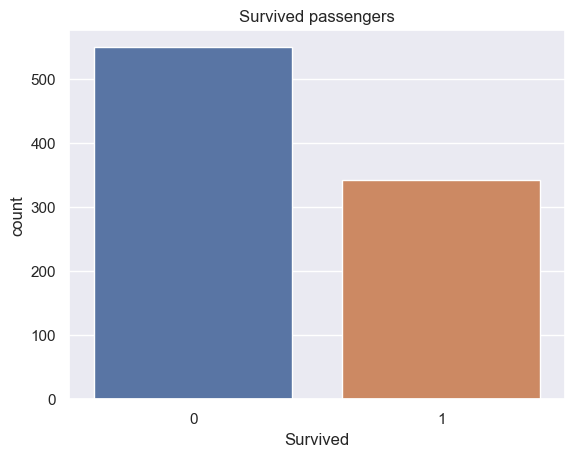

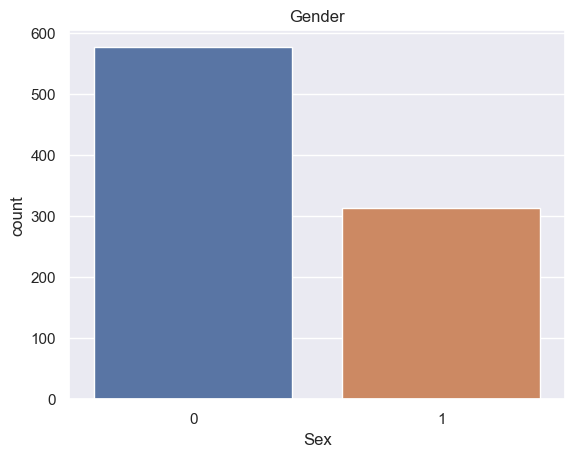

Text(0.5, 1.0, 'Number of Passengers in different class.')

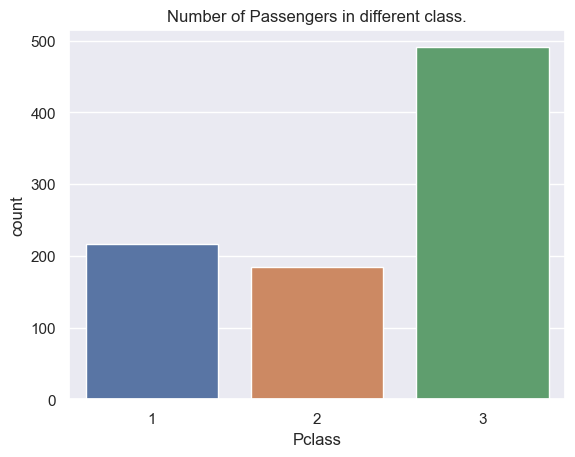

In [155]:
# Visualizing of the Data
sns.set()
sns.countplot(x = 'Survived', data = df).set_title('Survived passengers')
plt.show()
sns.countplot(x = 'Sex', data = df).set_title('Gender')
plt.show()
sns.countplot(x = 'Pclass', data = df).set_title('Number of Passengers in different class.')

# Logistic Regression 

In [156]:
# MODELLING
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

X_train = df.drop('Survived', axis=1)
y_train = df['Survived']
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred_train = LR.predict(X_train)

In [157]:
# TEST DATA
X_test = test
y_pred_test = LR.predict(X_test)

In [158]:
y_pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [159]:
res=pd.read_csv("C:/Users/Kiran/OneDrive/Desktop/gender_submission.csv")
# Extract the 'Survived' column into a NumPy array
result = np.array(res['Survived'])
result

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [160]:
print('Logistic Regression :')
print('Accuracy: ', accuracy_score(result, y_pred_test))
print('Precision: ', precision_score(result, y_pred_test))
print('Recall: ', recall_score(result, y_pred_test))
print('F1 Score: ', f1_score(result, y_pred_test))

Logistic Regression :
Accuracy:  0.9545454545454546
Precision:  0.9290322580645162
Recall:  0.9473684210526315
F1 Score:  0.9381107491856677


In [161]:
acc_log = round(accuracy_score(result, y_pred_test), 4) * 100
print("\nAccuracy of Test Data is = ", acc_log, "%")
print("\nAccuracy of TRAIN Data is = ", accuracy_score(y_train,y_pred_train)*100, "%")
classification_report_result = classification_report(result, y_pred_test)
confusion_mat = confusion_matrix(result, y_pred_test)
print("\nClassification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_mat)

# Calculate the percentage of survival in TEST DATA FOR LOGISTIC REGRESSION
percentage=round(y_pred_test.mean()*100,2)
print(f"\nThe percentage of survival of people in the Test Data is: {percentage}%\n")

# Calculate the percentage of survival in TRAIN DATA FOR LOGISTIC REGRESSION
element_count = np.count_nonzero(y_pred_train == 1)
total_elements = y_pred_train.size
percentage = round((element_count / total_elements) * 100,4)
print(f"The percentage of survival of people in the Train Data is: {percentage}%\n\n\n")


Accuracy of Test Data is =  95.45 %

Accuracy of TRAIN Data is =  81.59371492704825 %

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       266
           1       0.93      0.95      0.94       152

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418

Confusion Matrix:
 [[255  11]
 [  8 144]]

The percentage of survival of people in the Test Data is: 37.08%

The percentage of survival of people in the Train Data is: 36.5881%





In [162]:
classification_report_result = classification_report(y_train, y_pred_train)
confusion_mat = confusion_matrix(y_train, y_pred_train)
print("Classification Report For Training Data:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_mat)

Classification Report For Training Data:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       549
           1       0.77      0.74      0.75       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.80       891
weighted avg       0.81      0.82      0.82       891

Confusion Matrix:
 [[475  74]
 [ 90 252]]


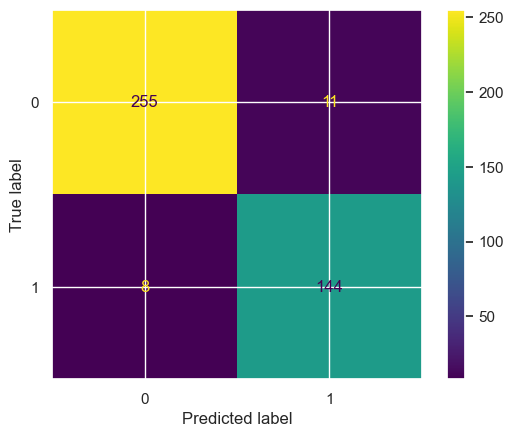

In [163]:
# Confusion Matrix
cm = confusion_matrix(result, y_pred_test, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot();

# RANDOM FOREST

In [164]:
random_forest=RandomForestClassifier(n_estimators=100) 
random_forest.fit(X_train,y_train)
y_pred_RF=random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_test, result)*100,2)

In [165]:
classification_report_result = classification_report(result, y_pred_RF)
confusion_mat = confusion_matrix(result, y_pred_RF)
print("\nClassification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_mat)


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       266
           1       0.75      0.77      0.76       152

    accuracy                           0.82       418
   macro avg       0.81      0.81      0.81       418
weighted avg       0.82      0.82      0.82       418

Confusion Matrix:
 [[226  40]
 [ 35 117]]


In [166]:
y_pred_train=random_forest.predict(X_train)
acc = round(random_forest.score(X_train, y_train)*100,2)
print(f"Accuracy on the training set: {acc :.2f}%")
accuracy = accuracy_score(y_pred_RF,result)
print(f"Accuracy on the testing set: {accuracy * 100:.2f}%")

Accuracy on the training set: 93.27%
Accuracy on the testing set: 82.06%


# SVC

In [167]:
linear_svc=LinearSVC() 
linear_svc.fit(X_train,y_train)
y_pred_SVC=linear_svc.predict(X_test)
acc_linear_svc = accuracy_score(result, y_pred_SVC)*100

In [168]:
y_pred_train=linear_svc.predict(X_train)
print(accuracy_score(result, y_pred_SVC)*100)

96.65071770334929


In [169]:
classification_report_result = classification_report(result, y_pred_SVC)
confusion_mat = confusion_matrix(result, y_pred_SVC)
print("\nClassification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_mat)


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       266
           1       0.94      0.97      0.95       152

    accuracy                           0.97       418
   macro avg       0.96      0.97      0.96       418
weighted avg       0.97      0.97      0.97       418

Confusion Matrix:
 [[256  10]
 [  4 148]]


# LDA

In [170]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [171]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [172]:
y_pred_train = LDA.predict(X_train)

In [173]:
y_pred_LDA = LDA.predict(X_test)

In [174]:
accuracy_score(y_pred_LDA,result)

0.9736842105263158

# SUMMARY OF ALL MODELS

In [175]:
# Accuracy of each one
results=pd.DataFrame({'Model':['Support Vector Machines', 'Logistic Regression', 'Random Forest','LDA'],'Accuracy(%)':[acc_linear_svc, acc_log, acc_random_forest,accuracy_score(y_pred_LDA,result)*100]})
result_df=results.sort_values(by='Accuracy(%)', ascending=False)
result_df =result_df.set_index('Accuracy(%)')
print(result_df.head())

                               Model
Accuracy(%)                         
97.368421                        LDA
96.650718    Support Vector Machines
95.450000        Logistic Regression
82.060000              Random Forest
